In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
#from config import api_key
api_key="2ada45f7c6c694a273cb754d33d8e8b3"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#cities_df = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#print(lats)
# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
print(len(cities))

#print(cities[1])

615


# Create a Dataframe for City Data

In [3]:
#Create an empty dataframe
cities_df = pd.DataFrame()

#Add cities from cities list into dataframe
cities_df['City'] = cities

# Set up additional columns to hold information
cities_df['Country'] = ""
cities_df['Date_Checked']= ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temp(K)'] = ""
cities_df['MaxTemp(K)'] = ""
#cities_df['Temp(F)'] = ""
cities_df['Humidity(%)'] = ""
cities_df['Cloudiness(%)'] = ""
cities_df['Wind_Speed(meter/sec)'] = ""
#cities_df['Wind_Speed(mph)'] = ""

cities_df.head()



,City,Country,Date_Checked,Latitude,Longitude,Temp(K),MaxTemp(K),Humidity(%),Cloudiness(%),Wind_Speed(meter/sec)
0,maumere,,,,,,,,,
1,usinsk,,,,,,,,,
2,nanortalik,,,,,,,,,
3,barrow,,,,,,,,,
4,puerto ayora,,,,,,,,,


# Perform API Calls and Push Data into DataFrame 

In [4]:
#Hard code target URL to check if API key is working
target_url = ('http://api.openweathermap.org/data/2.5/weather?q=sioux falls&APPID=2ada45f7c6c694a273cb754d33d8e8b3')

# Run a request to endpoint and convert result to json
weather_data = requests.get(target_url).json()

# Print the json
print(json.dumps(weather_data, indent=4, sort_keys=True))



{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.55,
        "lon": -96.7
    },
    "dt": 1554937269,
    "id": 5231851,
    "main": {
        "humidity": 99,
        "pressure": 1008,
        "temp": 272.37,
        "temp_max": 273.15,
        "temp_min": 271.15
    },
    "name": "Sioux Falls",
    "snow": {
        "1h": 0.51
    },
    "sys": {
        "country": "US",
        "id": 4143,
        "message": 0.0044,
        "sunrise": 1554897165,
        "sunset": 1554944585,
        "type": 1
    },
    "visibility": 3219,
    "weather": [
        {
            "description": "snow",
            "icon": "13d",
            "id": 601,
            "main": "Snow"
        },
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        },
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "ma

In [5]:
#Perform API Calls and Convert Raw Data to DataFrame

#print(weather_data["name"])
#print(weather_data["wind"]["speed"])

# Use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    target_city = row["City"]
    
    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {target_city}.")
    
    target_url = ('http://api.openweathermap.org/data/2.5/'
    'weather?q={0}&APPID={1}').format(target_city, api_key)
    
   # Run a request to endpoint and convert result to json
    weather_data = requests.get(target_url).json()

   
    try:
        #print(f"Finding {target_city} data with  latitude {weather_data['coord']['lat']}.")
        
        cities_df.loc[index, 'City'] = weather_data['name']
        cities_df.loc[index, 'Country'] = weather_data['sys']['country']
        cities_df.loc[index, 'Date_Checked'] = weather_data['dt']
        cities_df.loc[index, 'Latitude'] = weather_data['coord']['lat']
        cities_df.loc[index, 'Longitude'] = weather_data['coord']['lon']
        cities_df.loc[index, 'Temp(K)'] = weather_data['main']['temp']
        cities_df.loc[index, "MaxTemp(K)"] = weather_data['main']['temp_max']
        cities_df.loc[index, 'Humidity(%)'] = weather_data['main']['humidity']
        cities_df.loc[index, 'Cloudiness(%)'] = weather_data['clouds']['all']
        cities_df.loc[index, 'Wind_Speed(meter/sec)'] = weather_data['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
        
           
    
cities_df
    
    




Retrieving Results for Index 0: maumere.
------------
Retrieving Results for Index 1: usinsk.
------------
Retrieving Results for Index 2: nanortalik.
------------
Retrieving Results for Index 3: barrow.
------------
Retrieving Results for Index 4: puerto ayora.
------------
Retrieving Results for Index 5: barentsburg.
Missing field/result... skipping.
------------
Retrieving Results for Index 6: rawson.
------------
Retrieving Results for Index 7: narsaq.
------------
Retrieving Results for Index 8: mato verde.
------------
Retrieving Results for Index 9: busselton.
------------
Retrieving Results for Index 10: jan kempdorp.
------------
Retrieving Results for Index 11: sao filipe.
------------
Retrieving Results for Index 12: atuona.
------------
Retrieving Results for Index 13: kungurtug.
------------
Retrieving Results for Index 14: siilinjarvi.
------------
Retrieving Results for Index 15: taolanaro.
Missing field/result... skipping.
------------
Retrieving Results for Index 16: t

------------
Retrieving Results for Index 137: lamar.
------------
Retrieving Results for Index 138: alice.
------------
Retrieving Results for Index 139: tasiilaq.
------------
Retrieving Results for Index 140: nome.
------------
Retrieving Results for Index 141: pacific grove.
------------
Retrieving Results for Index 142: hualmay.
------------
Retrieving Results for Index 143: amderma.
Missing field/result... skipping.
------------
Retrieving Results for Index 144: oltina.
------------
Retrieving Results for Index 145: tuatapere.
------------
Retrieving Results for Index 146: olinda.
------------
Retrieving Results for Index 147: saint-augustin.
------------
Retrieving Results for Index 148: san cristobal.
------------
Retrieving Results for Index 149: verkhnevilyuysk.
------------
Retrieving Results for Index 150: tashla.
------------
Retrieving Results for Index 151: wellington.
------------
Retrieving Results for Index 152: iqaluit.
------------
Retrieving Results for Index 153: 

------------
Retrieving Results for Index 272: broken hill.
------------
Retrieving Results for Index 273: tigzirt.
------------
Retrieving Results for Index 274: inhambane.
------------
Retrieving Results for Index 275: lompoc.
------------
Retrieving Results for Index 276: saint-leu.
------------
Retrieving Results for Index 277: tarbert.
------------
Retrieving Results for Index 278: barranca.
------------
Retrieving Results for Index 279: sorland.
------------
Retrieving Results for Index 280: payo.
------------
Retrieving Results for Index 281: semkhoz.
------------
Retrieving Results for Index 282: tarudant.
Missing field/result... skipping.
------------
Retrieving Results for Index 283: arco.
------------
Retrieving Results for Index 284: pizhma.
------------
Retrieving Results for Index 285: baracoa.
------------
Retrieving Results for Index 286: shimoda.
------------
Retrieving Results for Index 287: leogane.
------------
Retrieving Results for Index 288: smithers.
-----------

------------
Retrieving Results for Index 409: chitipa.
------------
Retrieving Results for Index 410: nouakchott.
------------
Retrieving Results for Index 411: ubatuba.
------------
Retrieving Results for Index 412: santa eulalia del rio.
Missing field/result... skipping.
------------
Retrieving Results for Index 413: maruoka.
------------
Retrieving Results for Index 414: monster.
------------
Retrieving Results for Index 415: boddam.
------------
Retrieving Results for Index 416: alyangula.
------------
Retrieving Results for Index 417: anadyr.
------------
Retrieving Results for Index 418: bethal.
------------
Retrieving Results for Index 419: ambunti.
------------
Retrieving Results for Index 420: hovd.
------------
Retrieving Results for Index 421: sur.
------------
Retrieving Results for Index 422: naliya.
------------
Retrieving Results for Index 423: maniitsoq.
------------
Retrieving Results for Index 424: scottsbluff.
------------
Retrieving Results for Index 425: nipawin.


------------
Retrieving Results for Index 545: alotau.
Missing field/result... skipping.
------------
Retrieving Results for Index 546: aklavik.
------------
Retrieving Results for Index 547: iskateley.
------------
Retrieving Results for Index 548: sentyabrskiy.
Missing field/result... skipping.
------------
Retrieving Results for Index 549: kieta.
------------
Retrieving Results for Index 550: nagorsk.
------------
Retrieving Results for Index 551: sibolga.
------------
Retrieving Results for Index 552: berlevag.
------------
Retrieving Results for Index 553: pauini.
------------
Retrieving Results for Index 554: poznan.
------------
Retrieving Results for Index 555: tingi.
------------
Retrieving Results for Index 556: paamiut.
------------
Retrieving Results for Index 557: adrar.
------------
Retrieving Results for Index 558: green river.
------------
Retrieving Results for Index 559: kyshtovka.
------------
Retrieving Results for Index 560: sindi.
------------
Retrieving Results f

,City,Country,Date_Checked,Latitude,Longitude,Temp(K),MaxTemp(K),Humidity(%),Cloudiness(%),Wind_Speed(meter/sec)
0,Maumere,ID,1554937376,-8.63,122.22,300.274,300.274,100,32,0.66
1,Usinsk,RU,1554937376,66,57.56,260.174,260.174,79,36,4.66
2,Nanortalik,GL,1554937376,60.14,-45.24,274.074,274.074,90,32,7.16
3,Barrow,AR,1554937185,-38.31,-60.23,287.774,287.774,92,92,4.76
4,Puerto Ayora,EC,1554937330,-0.74,-90.35,300.67,302.15,66,75,7.2
5,barentsburg,,,,,,,,,
6,Rawson,AR,1554937183,-43.3,-65.11,284.924,284.924,73,0,3.46
7,Narsaq,GL,1554933000,60.91,-46.05,282.15,282.15,29,0,9.8
8,Mato Verde,BR,1554937377,-15.4,-42.86,292.974,292.974,93,64,1.11
9,Busselton,AU,1554937072,-33.64,115.35,287.04,287.59,69,92,4.31


In [6]:
#Replace empty space with NaN
new_cities_df = cities_df.replace(r'^\s*$', np.nan, regex=True)
#new_cities_df
#Drop rows with missing values
new_cities_df_2 = new_cities_df.dropna(axis = 0, how = "any")
new_cities_df_2


,City,Country,Date_Checked,Latitude,Longitude,Temp(K),MaxTemp(K),Humidity(%),Cloudiness(%),Wind_Speed(meter/sec)
1,Nome,US,1.553632e+09,30.04,-94.42,296.960,298.710,40.0,1.0,4.26
2,Ust-Maya,RU,1.553632e+09,60.42,134.54,257.338,257.338,79.0,48.0,2.01
3,Jamestown,AU,1.553632e+09,-33.21,138.60,279.188,279.188,80.0,0.0,2.46
4,Georgetown,GY,1.553627e+09,6.80,-58.16,303.150,303.150,58.0,75.0,5.10
5,Severo-Kurilsk,RU,1.553632e+09,50.68,156.12,270.338,270.338,100.0,36.0,3.81
6,New Norfolk,AU,1.553631e+09,-42.78,147.06,279.020,282.150,70.0,0.0,3.10
7,Vaini,IN,1.553632e+09,15.34,74.49,294.588,294.588,93.0,20.0,0.76
8,Hithadhoo,MV,1.553632e+09,-0.60,73.08,301.888,301.888,100.0,80.0,2.06
9,Necochea,AR,1.553631e+09,-38.55,-58.74,290.930,290.930,56.0,0.0,2.68
10,Bara,NG,1.553632e+09,10.41,10.60,299.888,299.888,24.0,0.0,4.21


In [ ]:
#Convert Temperature from Kelvin to Fahrenheit
#Convert Wind Speed from meters/second to miles/hour

temp_fahrenheit = []
maxtemp_fahrenheit = []
wind_speed_mph = []

for values in new_cities_df_2["Temp(K)"]:
    current_temp_Kelvin = values
    current_temp_Fahrenheit = (current_temp_Kelvin - 273.15) *(9/5)+32
    #print(current_Fahrenheit)
    temp_fahrenheit.append(current_temp_Fahrenheit)

for values in new_cities_df_2["MaxTemp(K)"]:
    current_maxtemp_Kelvin = values
    current_maxtemp_Fahrenheit = (current_maxtemp_Kelvin - 273.15) *(9/5)+32
    #print(current_Fahrenheit)
    maxtemp_fahrenheit.append(current_maxtemp_Fahrenheit)

for values in new_cities_df_2["Wind_Speed(meter/sec)"]:
    current_wind_speed_ms = values
    current_wind_speed_mph = current_wind_speed_ms * 2.237
    wind_speed_mph.append(current_wind_speed_mph)

rounded_temp_fahrenheit = [round(x) for x in temp_fahrenheit]
rounded_maxtemp_fahrenheit = [round(x) for x in maxtemp_fahrenheit]
rounded_wind_speed_mph = [round(x) for x in wind_speed_mph]
#print(rounded_fahrenheit)

new_cities_df_2['Temp(F)'] = rounded_temp_fahrenheit
new_cities_df_2['MaxTemp(F)'] = rounded_maxtemp_fahrenheit
new_cities_df_2['Wind_Speed(mph)'] = rounded_wind_speed_mph
new_cities_df_2

#save the dataframe to a CSV
new_cities_df_2.to_csv('cities_data.csv')


# Plotting the Data

## Latitude vs. Temperature Plot

In [ ]:
# Tells matplotlib that we want to make a scatter plot
x_axis = new_cities_df_2["Latitude"]
y_axis = new_cities_df_2["MaxTemp(F)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)


#plt.legend(label)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs. Max Temp (3/26/2019)')

# Save Figure
plt.savefig("MaxTempvsLatitude.png")
plt.show()

plt.show()

## Latitude vs. Humidity Plot

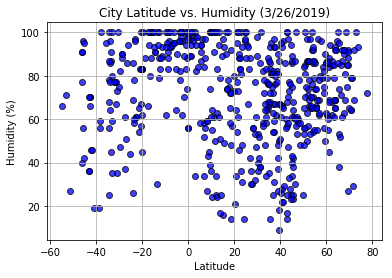

In [23]:
# Tells matplotlib that we want to make a scatter plot
x_axis = new_cities_df_2["Latitude"]
y_axis = new_cities_df_2["Humidity(%)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)


#plt.legend(label)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/26/2019)')

# Save Figure
plt.savefig("HumidityvsLatitude.png")
plt.show()

plt.show()

## Latitude vs. Cloudiness Plot

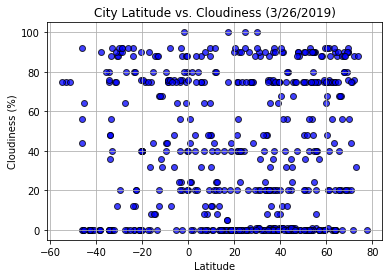

In [24]:
# Tells matplotlib that we want to make a scatter plot
x_axis = new_cities_df_2["Latitude"]
y_axis = new_cities_df_2["Cloudiness(%)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)


#plt.legend(label)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/26/2019)')

# Save Figure
plt.savefig("CloudinessvsLatitude.png")
plt.show()

plt.show()

## Latitude vs. Wind Speed Plot

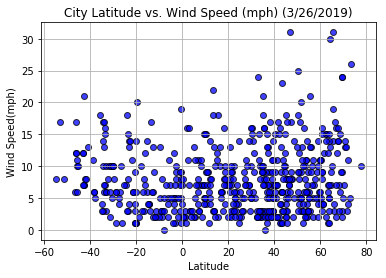

In [25]:
# Tells matplotlib that we want to make a scatter plot
x_axis = new_cities_df_2["Latitude"]
y_axis = new_cities_df_2["Wind_Speed(mph)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)


#plt.legend(label)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed (mph) (3/26/2019)')

# Save Figure
plt.savefig("WindSpeedvsLatitude.png")
plt.show()

plt.show()